In [1]:
import tensorflow
import keras
print(tensorflow.__version__)
print(keras.__version__)

2.8.0
2.8.0


#訓練データの読み込み
##cifar-10の読み込み

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator

(x_train, y_train),(x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 7s 0us/step


##モデルの構築


In [3]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils as np_utils

batch_size = 32
epochs = 20
n_class = 10

# one-hot表現に
y_train = np_utils.to_categorical(y_train,n_class)
y_test = np_utils.to_categorical(y_test,n_class)

model = Sequential()

# ゼロパディング、バッチサイズ以外の画像の形状を指定
model.add(Conv2D(32, (3,3), padding="same",input_shape=x_train.shape[1:]))
model.add(Activation("relu"))
model.add(Conv2D(32, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), padding="same"))
model.add(Activation("relu"))
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten()) #一次元の配列に変換
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dropout(0.5)) #ドロップアウト層
model.add(Dense(n_class)) 
model.add(Activation("softmax"))

model.compile(
    optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy']
    )
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        18496     
                                                        

##学習

In [4]:
#正規化
x_train = x_train / 255
x_test  = x_test / 255

generator = ImageDataGenerator(
    rotation_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=10,
    zoom_range=0.2,
    horizontal_flip=True
)
generator.fit(x_train)

history = model.fit_generator(generator.flow(x_train, y_train, batch_size=batch_size),
                              epochs=epochs,
                              validation_data=(x_test, y_test))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/20
1563/1563 [==============================] - 89s 48ms/step - loss: 1.7467 - accuracy: 0.3536 - val_loss: 1.4306 - val_accuracy: 0.4779
Epoch 2/20
1563/1563 [==============================] - 69s 44ms/step - loss: 1.4348 - accuracy: 0.4787 - val_loss: 1.2489 - val_accuracy: 0.5574
Epoch 3/20
1563/1563 [==============================] - 71s 45ms/step - loss: 1.2995 - accuracy: 0.5344 - val_loss: 1.1876 - val_accuracy: 0.5768
Epoch 4/20
1563/1563 [==============================] - 70s 45ms/step - loss: 1.2177 - accuracy: 0.5664 - val_loss: 1.0631 - val_accuracy: 0.6301
Epoch 5/20
1563/1563 [==============================] - 67s 43ms/step - loss: 1.1584 - accuracy: 0.5892 - val_loss: 1.0187 - val_accuracy: 0.6435
Epoch 6/20
1563/1563 [==============================] - 66s 42ms/step - loss: 1.1005 - accuracy: 0.6135 - val_loss: 1.0052 - val_accuracy: 0.6537
Epoch 7/20
1563/1563 [==============================] - 72s 46ms/step - loss: 1.0655 - accuracy: 0.6230 - val_loss: 0.9083 -

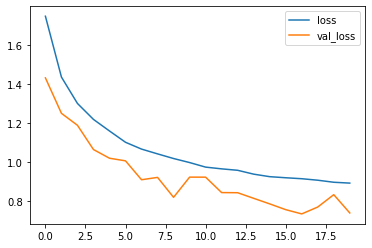

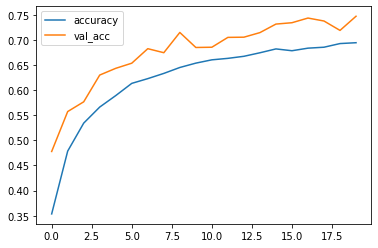

In [5]:
# 学習の推移を表示
import matplotlib.pyplot as plt

#訓練データの誤差
train_loss = history.history['loss']
#訓練データの精度
train_acc = history.history["accuracy"]
#検査データの誤差
val_loss = history.history['val_loss']
#訓練データの精度
val_acc = history.history["val_accuracy"]

plt.plot(np.arange(len(train_loss)), train_loss, label='loss')
plt.plot(np.arange(len(val_loss)), val_loss, label='val_loss')
plt.legend()
plt.show()

plt.plot(np.arange(len(train_acc)), train_acc, label='accuracy')
plt.plot(np.arange(len(val_acc)), val_acc, label='val_acc')
plt.legend()
plt.show()

In [6]:
# モデルの評価
loss, accuracy = model.evaluate(x_test,y_test)
print(loss,accuracy)

313/313 [==============================] - 4s 14ms/step - loss: 0.7380 - accuracy: 0.7472
0.7380129098892212 0.7472000122070312


In [7]:
# モデルの保存とダウンロード
from google.colab import files

model.save("image_classifier.h5",include_optimizer=False)
files.download('image_classifier.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>